## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Display the mouse_metadata

# Each row of the mouse_metadata dataset contains unique mouse
print(mouse_metadata.shape) 
mouse_metadata

(249, 5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
# Display the study_results

# The dataset looks to contains 10 entries for each mice
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset
drug_study_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
print(drug_study_df.shape)

# Display the data table for preview
drug_study_df

(1893, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
number_of_mice = drug_study_df['Mouse ID'].unique()
print(f"The number of mice is {len(number_of_mice)}") 

The number of mice is 249


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Use the duplicated() dataframe function to find the duplicated values inside the given columns
filt_duplicated = drug_study_df[['Mouse ID','Timepoint']].duplicated()

# Return the table with the duplicated data
duplicated_data = drug_study_df.loc[filt_duplicated==True]

# Return the rows that containst duplicated data
print(f"The duplicated data is in the following rows and Mouse ID {duplicated_data['Mouse ID'][filt_duplicated.loc[filt_duplicated==True]]}")


The duplicated data is in the following rows and Mouse ID 909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
drug_study_df.loc[drug_study_df['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = drug_study_df.loc[filt_duplicated==False]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = cleaned_df['Mouse ID'].unique()
print(f"The number of mice in the cleaned dataframe is {len(number_of_mice_clean)}") 

The number of mice in the cleaned dataframe is 249


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_regimed_grouped = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
drug_regimed_grouped.describe()

# Note that with this method we don't have access to median, variance and SEM


,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,156.0,52.393463,6.568014,45.000000,47.046068,50.909965,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [11]:
# Retrieve the list of all drugs used in the experiment
list_drugs = cleaned_df['Drug Regimen'].unique()
list_drugs

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [12]:
summary_list = []

In [13]:
# Use the list of drug regimen to calculate mean, media, std, var and SEM with a for loop
for n in range(len(list_drugs)):
    data = cleaned_df['Tumor Volume (mm3)'].loc[cleaned_df['Drug Regimen']==list_drugs[n]]
    mean_data = np.mean(data)
    median_data = np.median(data)
    std_data = np.std(data)
    var_data = np.var(data)
    SEM = sem(data)
    print(f"{list_drugs[n]}-> Mean:{round(mean_data,2)}, Median:{round(median_data,2)}, STD:{std_data}, Variance:{var_data}, SEM: {SEM}")
    summary_list.append({'Drug Regimen': list_drugs[n], 'Metric': 'Tumor Volume (mm3)', 
                         'Mean': mean_data, 'Median': median_data, 
                         'STD': std_data, 'Variance': var_data, 'SEM': SEM})

Ramicane-> Mean:40.22, Median:40.67, STD:4.83566873272521, Variance:23.38369209265624, SEM: 0.3209546065084816
Capomulin-> Mean:40.68, Median:41.56, STD:4.9839036488079875, Variance:24.839295580601572, SEM: 0.32934562340083096
Infubinol-> Mean:52.88, Median:51.82, STD:6.54876997233711, Variance:42.88638815058418, SEM: 0.4922356938011383
Placebo-> Mean:54.03, Median:52.29, STD:7.799367777397217, Variance:60.830137727102, SEM: 0.5813305510593876
Ceftamin-> Mean:52.59, Median:51.78, STD:6.250555650522812, Variance:39.06944594028265, SEM: 0.46982053275261093
Stelasyn-> Mean:54.23, Median:52.43, STD:7.6890900327362655, Variance:59.122105531524184, SEM: 0.5731109332771458
Zoniferol-> Mean:53.24, Median:51.82, STD:6.947423162693654, Variance:48.266688601532294, SEM: 0.5163978968332169
Ketapril-> Mean:55.24, Median:53.7, STD:8.257658894970028, Variance:68.18893042567763, SEM: 0.6038598237739697
Propriva-> Mean:52.39, Median:50.91, STD:6.546928494045774, Variance:42.86227270614847, SEM: 0.52586

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statists_df = pd.DataFrame(summary_list)
summary_statists_df.set_index(['Drug Regimen']).sort_values('Drug Regimen')

,Metric,Mean,Median,STD,Variance,SEM
Drug Regimen,,,,,,
Capomulin,Tumor Volume (mm3),40.675741,41.557809,4.983904,24.839296,0.329346
Ceftamin,Tumor Volume (mm3),52.591172,51.776157,6.250556,39.069446,0.469821
Infubinol,Tumor Volume (mm3),52.884795,51.820584,6.548770,42.886388,0.492236
Ketapril,Tumor Volume (mm3),55.235638,53.698743,8.257659,68.188930,0.603860
Naftisol,Tumor Volume (mm3),54.331565,52.509285,8.112811,65.817708,0.596466
Placebo,Tumor Volume (mm3),54.033581,52.288934,7.799368,60.830138,0.581331
Propriva,Tumor Volume (mm3),52.393463,50.909965,6.546928,42.862273,0.525862
Ramicane,Tumor Volume (mm3),40.216745,40.673236,4.835669,23.383692,0.320955
Stelasyn,Tumor Volume (mm3),54.233149,52.431737,7.689090,59.122106,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

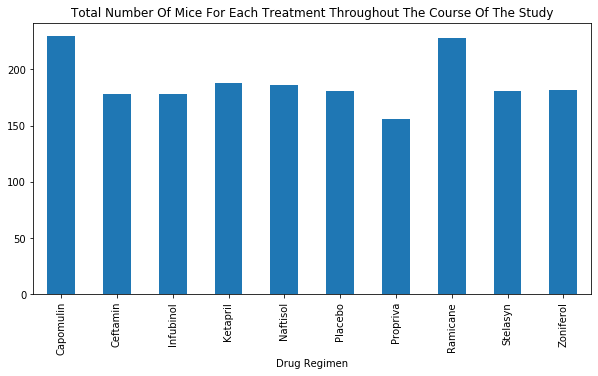

In [16]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# First, count the number of mice for each regimen
total_number_mice_treatment = cleaned_df.groupby('Drug Regimen')['Mouse ID'].count()

# Create a series with the data
gfg = pd.Series(total_number_mice_treatment)

# Plot the data using pandas
plt.figure(figsize=(10,5))
gfg.plot(kind='bar')
plt.title('Total number of mice for each treatment throughout the course of the study'.title())
plt.xlabel('Drug Regimen')
plt.show()

In [17]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



Sex
Female    930
Male      958
Name: Mouse ID, dtype: int64


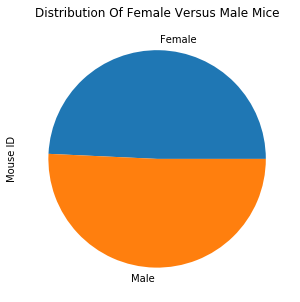

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


# First, count the number of mice for each regimen
sex_distribution = cleaned_df.groupby('Sex')['Mouse ID'].count()
print(sex_distribution)

# Create a series with the data
afd = pd.Series(sex_distribution)

# Plot the data using pandas
plt.figure(figsize=(10,5))
afd.plot(kind='pie')
plt.title('distribution of female versus male mice'.title())
# plt.xlabel('Drug Regimen')
# plt.ylabel('Drug Regimen')
plt.show()


In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_grouped = cleaned_df.groupby(['Mouse ID', 'Drug Regimen'])
# mouse_grouped.count()
mouse_grouped[['Timepoint','Tumor Volume (mm3)']].max()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Crete a filter to retrieve the target column
filt_greatest_timepoint = mouse_grouped[['Timepoint']].max()
greatest_timepoint_df = pd.DataFrame(filt_greatest_timepoint)
# greatest_timepoint_df
# Merge the dataframes in the selected columns
timepoint_merged_df = pd.merge(greatest_timepoint_df, cleaned_df, on=['Mouse ID', 'Drug Regimen', 'Timepoint'])
timepoint_merged_df

,Mouse ID,Drug Regimen,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,45,Female,20,23,67.973419,2
1,a251,Infubinol,45,Female,21,25,65.525743,1
2,a262,Placebo,45,Female,17,29,70.717621,4
3,a275,Ceftamin,45,Female,20,28,62.999356,3
4,a366,Stelasyn,30,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,10,Female,12,26,48.710661,0
245,z578,Ramicane,45,Male,11,16,30.638696,0
246,z581,Infubinol,45,Female,24,25,62.754451,3
247,z795,Naftisol,45,Female,13,29,65.741070,3


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for n in range(len(treatments)):

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = timepoint_merged_df.loc[timepoint_merged_df['Drug Regimen'] == treatments[n]]
    quantiles = tumor_volume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    Q1 = quantiles[0.25]
    Q3 = quantiles[0.75]
    iqr = Q3 - Q1
    lower_bound = Q1 - (1.5*iqr)
    upper_bound = Q3 + (1.5*iqr)
    
    # add subset 
    tumor_vol_data.append({'Drug Regimen': treatments[n], 'Tumor Volume (mm3)': tumor_volume['Tumor Volume (mm3)']}) 
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_volume.loc[(tumor_volume['Tumor Volume (mm3)'] < lower_bound) |
                            (tumor_volume['Tumor Volume (mm3)'] > upper_bound)]
    print(outliers) 
    

Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Timepoint, Sex, Age_months, Weight (g), Tumor Volume (mm3), Metastatic Sites]
Index: []
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Timepoint, Sex, Age_months, Weight (g), Tumor Volume (mm3), Metastatic Sites]
Index: []
   Mouse ID Drug Regimen  Timepoint     Sex  Age_months  Weight (g)  \
31     c326    Infubinol          5  Female          18          25   

    Tumor Volume (mm3)  Metastatic Sites  
31           36.321346                 0  
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Timepoint, Sex, Age_months, Weight (g), Tumor Volume (mm3), Metastatic Sites]
Index: []


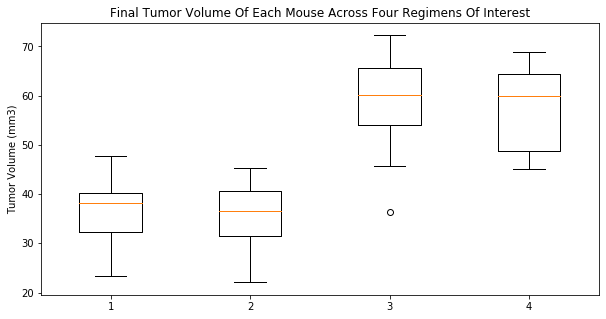

<Figure size 432x288 with 0 Axes>

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.figure(figsize=(10,5))

# Set title/labels
plt.title('final tumor volume of each mouse across four regimens of interest'.title())
plt.ylabel('Tumor Volume (mm3)')

# Create boxplot
fig = plt.boxplot ([tumor_vol_data[0]['Tumor Volume (mm3)'],
              tumor_vol_data[1]['Tumor Volume (mm3)'], 
              tumor_vol_data[2]['Tumor Volume (mm3)'], 
              tumor_vol_data[3]['Tumor Volume (mm3)']])

# fig.xlabel(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()
plt.tight_layout()

## Line and Scatter Plots

['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157']
Mouse: s185
    Timepoint  Tumor Volume (mm3)
10          0           45.000000
11          5           43.878496
12         10           37.614948
13         15           38.177232
14         20           36.866876
15         25           33.949940
16         30           32.959671
17         35           28.328531
18         40           25.472143
19         45           23.343598


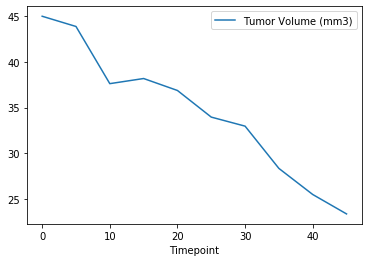

In [23]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Retrive all mice treated with Capomulin
mouse_id_Capomulin = cleaned_df['Mouse ID'].loc[cleaned_df['Drug Regimen'] == 'Capomulin'].unique()
print(mouse_id_Capomulin)

# 
print(f"Mouse: {mouse_id_Capomulin[0]}") 
print(cleaned_df[['Timepoint','Tumor Volume (mm3)']].loc[cleaned_df['Mouse ID'] == mouse_id_Capomulin[0]]) 
cleaned_df[['Timepoint','Tumor Volume (mm3)']].loc[cleaned_df['Mouse ID'] == mouse_id_Capomulin[0]].plot(x='Timepoint')

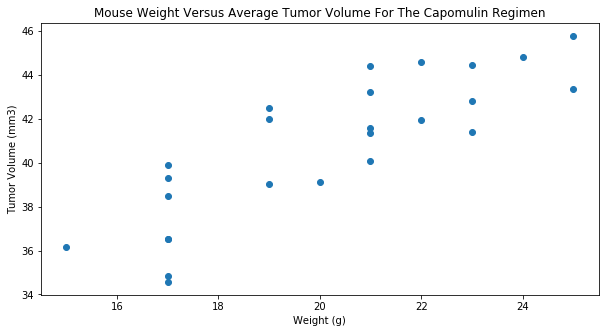

<Figure size 432x288 with 0 Axes>

In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']
mean_tumor_vol = []
mouse_weight = []

for n in range(len(mouse_id_Capomulin)):
    cleaned_df[['Weight (g)']].loc[cleaned_df['Mouse ID'] == mouse_id_Capomulin[n]]
    mouse_weight.append(np.mean(cleaned_df[['Weight (g)']].loc[cleaned_df['Mouse ID'] == mouse_id_Capomulin[n]]))
    mean_tumor_vol.append(np.mean(cleaned_df[['Tumor Volume (mm3)']].loc[cleaned_df['Mouse ID'] == mouse_id_Capomulin[n]]) )


# mouse_weight
# mean_tumor_vol


plt.figure(figsize=(10,5))

# Set title/labels
plt.title('mouse weight versus average tumor volume for the Capomulin regimen'.title())
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

# Create boxplot
fig = plt.scatter(mouse_weight, mean_tumor_vol)

plt.show()
plt.tight_layout()

## Correlation and Regression

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# correlation = sts.pearsonr(mouse_weight, mean_tumor_vol)

# print(f"The correlation coefficient (r) is {round(correlation[0],2)}")
# print(f"The p-value is {correlation[1]}")



[Weight (g)    17.0
 dtype: float64,
 Weight (g)    15.0
 dtype: float64,
 Weight (g)    17.0
 dtype: float64,
 Weight (g)    17.0
 dtype: float64,
 Weight (g)    17.0
 dtype: float64,
 Weight (g)    17.0
 dtype: float64,
 Weight (g)    17.0
 dtype: float64,
 Weight (g)    19.0
 dtype: float64,
 Weight (g)    17.0
 dtype: float64,
 Weight (g)    20.0
 dtype: float64,
 Weight (g)    21.0
 dtype: float64,
 Weight (g)    19.0
 dtype: float64,
 Weight (g)    19.0
 dtype: float64,
 Weight (g)    21.0
 dtype: float64,
 Weight (g)    22.0
 dtype: float64,
 Weight (g)    21.0
 dtype: float64,
 Weight (g)    23.0
 dtype: float64,
 Weight (g)    23.0
 dtype: float64,
 Weight (g)    21.0
 dtype: float64,
 Weight (g)    22.0
 dtype: float64,
 Weight (g)    23.0
 dtype: float64,
 Weight (g)    21.0
 dtype: float64,
 Weight (g)    25.0
 dtype: float64,
 Weight (g)    24.0
 dtype: float64,
 Weight (g)    25.0
 dtype: float64]

In [37]:
weight = cleaned_df[['Weight (g)']].loc[cleaned_df['Mouse ID'] == mouse_id_Capomulin[n]]
weight['Weight (g)']

1452    25
1453    25
1454    25
1455    25
Name: Weight (g), dtype: int64

In [46]:
sts.pearsonr(pd.Series(mouse_weight),pd.Series(mouse_weight))

ValueError: Lengths must match to compare

In [43]:
pd.Series(mean_tumor_vol)
pd.Series(mouse_weight)

0     Tumor Volume (mm3)    34.559143
dtype: float64
1      Tumor Volume (mm3)    36.18204
dtype: float64
2      Tumor Volume (mm3)    34.84747
dtype: float64
3     Tumor Volume (mm3)    36.505973
dtype: float64
4     Tumor Volume (mm3)    39.887495
dtype: float64
5     Tumor Volume (mm3)    38.506829
dtype: float64
6     Tumor Volume (mm3)    36.509212
dtype: float64
7     Tumor Volume (mm3)    39.049816
dtype: float64
8     Tumor Volume (mm3)    39.328725
dtype: float64
9     Tumor Volume (mm3)    39.141053
dtype: float64
10    Tumor Volume (mm3)    41.352452
dtype: float64
11    Tumor Volume (mm3)    41.990097
dtype: float64
12    Tumor Volume (mm3)    42.507261
dtype: float64
13    Tumor Volume (mm3)    40.083699
dtype: float64
14    Tumor Volume (mm3)    41.963636
dtype: float64
15    Tumor Volume (mm3)    43.216925
dtype: float64
16    Tumor Volume (mm3)    44.465236
dtype: float64
17    Tumor Volume (mm3)    41.384825
dtype: float64
18    Tumor Volume (mm3)    41.581595
dtype: f